In [ ]:
import zipfile
import os


zip_path = "/content/new_sdss.zip"


extract_to = "/content/sdss"


os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipping complete. Files extracted to:", extract_to)

Unzipping complete. Files extracted to: /content/sdss


In [ ]:
import zipfile
import os


zip_path = "/content/panstar.zip"

extract_to = "/content/pan"


os.makedirs(extract_to, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipping complete. Files extracted to:", extract_to)

Unzipping complete. Files extracted to: /content/pan


In [ ]:
import os

sdss_dir = "/content/sdss/new_sdss"
panstar_dir = "/content/pan/panstar"

sdss_files = sorted(os.listdir(sdss_dir))[:10]
panstar_files = sorted(os.listdir(panstar_dir))[:10]

print("Sample SDSS filenames:", sdss_files)
print("Sample Pan-STARRS filenames:", panstar_files)


Sample SDSS filenames: ['star_0_ra180.5775_dec-0.4676.jpg', 'star_100_ra180.4197_dec0.2716.jpg', 'star_10_ra180.5776_dec0.4249.jpg', 'star_11_ra180.5783_dec0.4434.jpg', 'star_12_ra180.4216_dec0.4419.jpg', 'star_13_ra180.4209_dec0.4303.jpg', 'star_14_ra180.2529_dec0.4903.jpg', 'star_15_ra180.2551_dec0.4885.jpg', 'star_16_ra180.1138_dec0.4882.jpg', 'star_17_ra180.8682_dec0.0123.jpg']
Sample Pan-STARRS filenames: ['star_0.jpeg', 'star_1.jpeg', 'star_10.jpeg', 'star_100.jpeg', 'star_11.jpeg', 'star_12.jpeg', 'star_13.jpeg', 'star_14.jpeg', 'star_15.jpeg', 'star_16.jpeg']


In [ ]:
import os
from PIL import Image


sdss_dir = "/content/sdss/new_sdss"
panstar_dir = "/content/pan/panstar"


aligned_clean = "/content/aligned/clean"
aligned_noisy = "/content/aligned/noisy"
os.makedirs(aligned_clean, exist_ok=True)
os.makedirs(aligned_noisy, exist_ok=True)


panstar_map = {}
for f in os.listdir(panstar_dir):
    if f.endswith(".jpeg"):
        try:
            img_id = f.split('_')[1].split('.')[0]
            panstar_map[img_id] = f
        except IndexError:
            continue

count = 0

for f in os.listdir(sdss_dir):
    if not f.endswith(".jpg"):
        continue
    try:
        img_id = f.split('_')[1]
        pan_file = panstar_map.get(img_id)
        if pan_file:
            clean_img = Image.open(os.path.join(sdss_dir, f)).convert('RGB')
            noisy_img = Image.open(os.path.join(panstar_dir, pan_file)).convert('RGB')
            clean_img.save(os.path.join(aligned_clean, f"{count}.jpg"))
            noisy_img.save(os.path.join(aligned_noisy, f"{count}.jpg"))
            count += 1
    except Exception as e:
        print(f"Error processing {f}: {e}")
        continue

print(f"✅ Created {count} aligned image pairs.")




✅ Created 101 aligned image pairs.


In [ ]:
aligned_clean = "/content/aligned/clean"
aligned_noisy = "/content/aligned/noisy"

In [ ]:
import random
import shutil


clean_dir = "/content/aligned/clean"
noisy_dir = "/content/aligned/noisy"


base_dir = "/content/aligned"

train_clean = os.path.join(base_dir, "train/clean")
train_noisy = os.path.join(base_dir, "train/noisy")
test_clean = os.path.join(base_dir, "test/clean")
test_noisy = os.path.join(base_dir, "test/noisy")


for path in [train_clean, train_noisy, test_clean, test_noisy]:
    os.makedirs(path, exist_ok=True)


all_filenames = sorted(os.listdir(clean_dir))
random.shuffle(all_filenames)

# 80-20 split
split_idx = int(0.8 * len(all_filenames))
train_files = all_filenames[:split_idx]
test_files = all_filenames[split_idx:]

# Helper function
def copy_images(file_list, src_clean, src_noisy, dst_clean, dst_noisy):
    for fname in file_list:
        shutil.copy(os.path.join(src_clean, fname), os.path.join(dst_clean, fname))
        shutil.copy(os.path.join(src_noisy, fname), os.path.join(dst_noisy, fname))

# Copy files
copy_images(train_files, clean_dir, noisy_dir, train_clean, train_noisy)
copy_images(test_files, clean_dir, noisy_dir, test_clean, test_noisy)

print(f"✅ Split done: {len(train_files)} train and {len(test_files)} test images.")


✅ Split done: 80 train and 21 test images.


In [ ]:
!pip install pytorch-msssim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from pytorch_msssim import ssim
def ssim_loss(x, y):
    return 1 - ssim(x, y, data_range=1.0, size_average=True)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import vgg16

class PerceptualLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = vgg16(pretrained=True).features[:16].eval()
        for param in self.vgg.parameters():
            param.requires_grad = False

    def forward(self, x, y):
        return F.l1_loss(self.vgg(x), self.vgg(y))

In [ ]:
import torch
# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
perceptual_loss = PerceptualLoss().to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 81.7MB/s]


In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from PIL import Image
from tqdm import tqdm
import timm
from torchvision.models import vgg16
from pytorch_msssim import ssim

# Defining model, losses, and dataset classes
class SwinIR(nn.Module):
    def __init__(self, in_chans=3, pretrained=True):
        super().__init__() # Call the parent class constructor

        base_model = timm.create_model(
             'swin_small_patch4_window7_224',
             pretrained=pretrained,
             in_chans=in_chans,
        )

        self.backbone = timm.create_model(
             'swin_small_patch4_window7_224',
             pretrained=False,
             in_chans=in_chans,
             features_only=True,
             out_indices=(0, 1, 2, 3),
             depths=(8, 8, 8, 8),
        )

        self.backbone.load_state_dict(base_model.state_dict(), strict=False)

        dummy_input = torch.zeros(1, in_chans, 224, 224)
        with torch.no_grad():
            features = self.backbone(dummy_input)

        total_channels = sum(feat.shape[1] for feat in features)
        print(f"Total feature channels: {total_channels}")

        self.multi_scale_fusion = MultiScaleFusion(total_channels)

        self.se = SEBlock(total_channels)

        self.output_conv = nn.Conv2d(total_channels, in_chans, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        original_size = x.shape[-2:]
        feats = self.backbone(x)

        if feats:
            target_size = feats[0].shape[-2:]
            feats_up = [F.interpolate(f, size=target_size, mode='bilinear', align_corners=False) for f in feats]
            x = torch.cat(feats_up, dim=1)
        else:
             print("Warning: Backbone returned no features.")
             raise RuntimeError("Backbone did not produce any feature maps.")

        x = self.multi_scale_fusion(x)
        x = self.se(x)
        x = self.output_conv(x)
        x = F.interpolate(x, size=original_size, mode='bilinear', align_corners=False)
        return x

class MultiScaleFusion(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        channels_half1 = in_channels // 2
        channels_half2 = in_channels - channels_half1
        self.conv1x1 = nn.Conv2d(in_channels, channels_half1, kernel_size=1)
        self.conv3x3 = nn.Conv2d(in_channels, channels_half2, kernel_size=3, padding=1)
        self.conv_fuse = nn.Conv2d(in_channels, in_channels, kernel_size=1)

    def forward(self, x):
        x1 = self.conv1x1(x)
        x2 = self.conv3x3(x)
        x_fuse = torch.cat([x1, x2], dim=1)
        return self.conv_fuse(x_fuse)

class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

class AstroDenoiseDataset(Dataset):
    def __init__(self, noisy_dir, clean_dir):
        self.noisy_dir = noisy_dir
        self.clean_dir = clean_dir
        self.filenames = sorted(os.listdir(noisy_dir))
        self.transform = T.Compose([
            T.Resize((224, 224)),
            T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        noisy_path = os.path.join(self.noisy_dir, filename)
        clean_path = os.path.join(self.clean_dir, filename)

        try:
            noisy = Image.open(noisy_path).convert('RGB')
            clean = Image.open(clean_path).convert('RGB')
        except Exception as e:
            print(f"Error loading images: {e}, file: {filename}")
            idx = max(0, idx-1)
            return self.__getitem__(idx)

        return self.transform(noisy), self.transform(clean)

def sobel_edge_loss(pred, target):
    # Apply to each channel separately
    loss = 0.0
    for c in range(pred.shape[1]):
        sobel_x = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]],
                               dtype=torch.float32, device=pred.device).view(1, 1, 3, 3)
        sobel_y = sobel_x.permute(0, 1, 3, 2)

        edge_x_pred = F.conv2d(pred[:, c:c+1, :, :], sobel_x, padding=1)
        edge_y_pred = F.conv2d(pred[:, c:c+1, :, :], sobel_y, padding=1)
        edge_x_gt = F.conv2d(target[:, c:c+1, :, :], sobel_x, padding=1)
        edge_y_gt = F.conv2d(target[:, c:c+1, :, :], sobel_y, padding=1)

        edge_pred = torch.sqrt(edge_x_pred**2 + edge_y_pred**2 + 1e-8)
        edge_gt = torch.sqrt(edge_x_gt**2 + edge_y_gt**2 + 1e-8)

        loss += F.l1_loss(edge_pred, edge_gt)

    return loss / pred.shape[1]  # Average over channels


def ssim_loss(x, y):
    return 1 - ssim(x, y, data_range=1.0, size_average=True)


# --- Training Loop ---
epochs = 300

# Initialize device, model, optimizer, and loss functions
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = SwinIR(pretrained=True).to(device)
print(f"Model created with feature dimensions")

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=5e-2)

perceptual_loss = PerceptualLoss().to(device)

aligned_clean = "/content/aligned/clean"
aligned_noisy = "/content/aligned/noisy"

batch_size = 8
num_workers = 2 if torch.cuda.is_available() else 0
train_dataset = AstroDenoiseDataset(train_noisy, train_clean)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=torch.cuda.is_available(),
)
print(f"Dataset loaded with {len(train_dataset)} images")

loss_history = []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}") as pbar:
        for noisy, clean in pbar:
            # Move data to device
            noisy, clean = noisy.to(device), clean.to(device)

            # Debug check input shapes
            if epoch == 0 and pbar.n == 0:
                print(f"Input shapes - Noisy: {noisy.shape}, Clean: {clean.shape}")

            # Forward pass
            output = model(noisy)

            # Debug check output shape
            if epoch == 0 and pbar.n == 0:
                print(f"Output shape: {output.shape}")

            # Verify shapes match - this is for warning, not control flow
            if output.shape != clean.shape:
                print(f"WARNING: Shape mismatch - Output: {output.shape}, Target: {clean.shape}")

            # Calculate the loss unconditionally
            loss = (
                0.4 * F.l1_loss(output, clean) +
                0.2 * perceptual_loss(output, clean) +
                0.1 * sobel_edge_loss(output, clean) +
                0.3 * ssim_loss(output, clean)
            )

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update statistics
            total_loss += loss.item()
            pbar.set_postfix(loss=f"{loss.item():.4f}")

    # Print epoch stats
    avg_loss = total_loss / len(train_loader)
    print(f"📉 Epoch {epoch+1} Loss: {avg_loss:.4f}")
    loss_history.append(avg_loss)

    # Save checkpoint every 5 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint_path = f"swinir_sdss_denoise_checkpoint_ep{epoch+1}.pth"
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
        }, checkpoint_path)
        print(f"✅ Checkpoint saved: {checkpoint_path}")

torch.save(model.state_dict(), "swinir_sdss_denoise_final.pth")
print("✅ Final model saved as swinir_sdss_denoise_final.pth")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/200M [00:00<?, ?B/s]

Total feature channels: 105
Model created with feature dimensions


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Dataset loaded with 80 images


Epoch 1/300:   0%|          | 0/10 [00:00<?, ?it/s]

Input shapes - Noisy: torch.Size([8, 3, 224, 224]), Clean: torch.Size([8, 3, 224, 224])
Output shape: torch.Size([8, 3, 224, 224])


Epoch 1/300: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s, loss=0.6732]


📉 Epoch 1 Loss: 0.8920


Epoch 2/300: 100%|██████████| 10/10 [00:04<00:00,  2.39it/s, loss=0.4519]


📉 Epoch 2 Loss: 0.5198


Epoch 3/300: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s, loss=0.4309]


📉 Epoch 3 Loss: 0.4442


Epoch 4/300: 100%|██████████| 10/10 [00:04<00:00,  2.39it/s, loss=0.3919]


📉 Epoch 4 Loss: 0.4022


Epoch 5/300: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s, loss=0.3721]


📉 Epoch 5 Loss: 0.3820
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep5.pth


Epoch 6/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.3627]


📉 Epoch 6 Loss: 0.3743


Epoch 7/300: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s, loss=0.3411]


📉 Epoch 7 Loss: 0.3625


Epoch 8/300: 100%|██████████| 10/10 [00:04<00:00,  2.36it/s, loss=0.3378]


📉 Epoch 8 Loss: 0.3518


Epoch 9/300: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s, loss=0.3559]


📉 Epoch 9 Loss: 0.3494


Epoch 10/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.3398]


📉 Epoch 10 Loss: 0.3511
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep10.pth


Epoch 11/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.3316]


📉 Epoch 11 Loss: 0.3413


Epoch 12/300: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s, loss=0.3294]


📉 Epoch 12 Loss: 0.3809


Epoch 13/300: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s, loss=0.3331]


📉 Epoch 13 Loss: 0.3363


Epoch 14/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3306]


📉 Epoch 14 Loss: 0.3373


Epoch 15/300: 100%|██████████| 10/10 [00:04<00:00,  2.29it/s, loss=0.3378]


📉 Epoch 15 Loss: 0.3341
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep15.pth


Epoch 16/300: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s, loss=0.3255]


📉 Epoch 16 Loss: 0.3305


Epoch 17/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.3169]


📉 Epoch 17 Loss: 0.3185


Epoch 18/300: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s, loss=0.3216]


📉 Epoch 18 Loss: 0.3179


Epoch 19/300: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s, loss=0.3201]


📉 Epoch 19 Loss: 0.3127


Epoch 20/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.3343]


📉 Epoch 20 Loss: 0.3141
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep20.pth


Epoch 21/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2973]


📉 Epoch 21 Loss: 0.3196


Epoch 22/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.3105]


📉 Epoch 22 Loss: 0.3118


Epoch 23/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3197]


📉 Epoch 23 Loss: 0.3116


Epoch 24/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.3080]


📉 Epoch 24 Loss: 0.3097


Epoch 25/300: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=0.3145]


📉 Epoch 25 Loss: 0.3084
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep25.pth


Epoch 26/300: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=0.3225]


📉 Epoch 26 Loss: 0.3035


Epoch 27/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.3029]


📉 Epoch 27 Loss: 0.3032


Epoch 28/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.3048]


📉 Epoch 28 Loss: 0.3029


Epoch 29/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2908]


📉 Epoch 29 Loss: 0.3041


Epoch 30/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3059]


📉 Epoch 30 Loss: 0.2992
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep30.pth


Epoch 31/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2922]


📉 Epoch 31 Loss: 0.3007


Epoch 32/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.3350]


📉 Epoch 32 Loss: 0.3051


Epoch 33/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3018]


📉 Epoch 33 Loss: 0.3032


Epoch 34/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3020]


📉 Epoch 34 Loss: 0.2994


Epoch 35/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.3029]


📉 Epoch 35 Loss: 0.2980
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep35.pth


Epoch 36/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2840]


📉 Epoch 36 Loss: 0.2991


Epoch 37/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2858]


📉 Epoch 37 Loss: 0.2985


Epoch 38/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3200]


📉 Epoch 38 Loss: 0.2986


Epoch 39/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2942]


📉 Epoch 39 Loss: 0.3048


Epoch 40/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3043]


📉 Epoch 40 Loss: 0.3025
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep40.pth


Epoch 41/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.3019]


📉 Epoch 41 Loss: 0.3006


Epoch 42/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.2862]


📉 Epoch 42 Loss: 0.2995


Epoch 43/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.2808]


📉 Epoch 43 Loss: 0.2981


Epoch 44/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.3083]


📉 Epoch 44 Loss: 0.2962


Epoch 45/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2878]


📉 Epoch 45 Loss: 0.2972
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep45.pth


Epoch 46/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2981]


📉 Epoch 46 Loss: 0.2948


Epoch 47/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.2781]


📉 Epoch 47 Loss: 0.2939


Epoch 48/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2869]


📉 Epoch 48 Loss: 0.2945


Epoch 49/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.3038]


📉 Epoch 49 Loss: 0.2936


Epoch 50/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2771]


📉 Epoch 50 Loss: 0.2926
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep50.pth


Epoch 51/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2843]


📉 Epoch 51 Loss: 0.2926


Epoch 52/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2950]


📉 Epoch 52 Loss: 0.2927


Epoch 53/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.3086]


📉 Epoch 53 Loss: 0.2921


Epoch 54/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2843]


📉 Epoch 54 Loss: 0.2914


Epoch 55/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2949]


📉 Epoch 55 Loss: 0.2916
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep55.pth


Epoch 56/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.3062]


📉 Epoch 56 Loss: 0.2945


Epoch 57/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.3069]


📉 Epoch 57 Loss: 0.2965


Epoch 58/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.2891]


📉 Epoch 58 Loss: 0.2932


Epoch 59/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2905]


📉 Epoch 59 Loss: 0.2926


Epoch 60/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2763]


📉 Epoch 60 Loss: 0.2918
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep60.pth


Epoch 61/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2877]


📉 Epoch 61 Loss: 0.2900


Epoch 62/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2805]


📉 Epoch 62 Loss: 0.2909


Epoch 63/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.3128]


📉 Epoch 63 Loss: 0.2886


Epoch 64/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2952]


📉 Epoch 64 Loss: 0.2885


Epoch 65/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.3093]


📉 Epoch 65 Loss: 0.2880
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep65.pth


Epoch 66/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2756]


📉 Epoch 66 Loss: 0.2896


Epoch 67/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2602]


📉 Epoch 67 Loss: 0.2884


Epoch 68/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2845]


📉 Epoch 68 Loss: 0.2886


Epoch 69/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.2665]


📉 Epoch 69 Loss: 0.2871


Epoch 70/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2940]


📉 Epoch 70 Loss: 0.2870
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep70.pth


Epoch 71/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2993]


📉 Epoch 71 Loss: 0.2860


Epoch 72/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2912]


📉 Epoch 72 Loss: 0.2854


Epoch 73/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2869]


📉 Epoch 73 Loss: 0.2865


Epoch 74/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2699]


📉 Epoch 74 Loss: 0.2854


Epoch 75/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.2958]


📉 Epoch 75 Loss: 0.2850
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep75.pth


Epoch 76/300: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s, loss=0.2688]


📉 Epoch 76 Loss: 0.2836


Epoch 77/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2860]


📉 Epoch 77 Loss: 0.2829


Epoch 78/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.3011]


📉 Epoch 78 Loss: 0.2827


Epoch 79/300: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s, loss=0.2914]


📉 Epoch 79 Loss: 0.2828


Epoch 80/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2591]


📉 Epoch 80 Loss: 0.2819
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep80.pth


Epoch 81/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.2858]


📉 Epoch 81 Loss: 0.2800


Epoch 82/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2763]


📉 Epoch 82 Loss: 0.2801


Epoch 83/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2788]


📉 Epoch 83 Loss: 0.2793


Epoch 84/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2872]


📉 Epoch 84 Loss: 0.2779


Epoch 85/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2897]


📉 Epoch 85 Loss: 0.2769
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep85.pth


Epoch 86/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2794]


📉 Epoch 86 Loss: 0.2767


Epoch 87/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2708]


📉 Epoch 87 Loss: 0.2781


Epoch 88/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2879]


📉 Epoch 88 Loss: 0.2765


Epoch 89/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2732]


📉 Epoch 89 Loss: 0.2761


Epoch 90/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2616]


📉 Epoch 90 Loss: 0.2747
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep90.pth


Epoch 91/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2869]


📉 Epoch 91 Loss: 0.2741


Epoch 92/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2778]


📉 Epoch 92 Loss: 0.2728


Epoch 93/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2873]


📉 Epoch 93 Loss: 0.2720


Epoch 94/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2668]


📉 Epoch 94 Loss: 0.2738


Epoch 95/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2740]


📉 Epoch 95 Loss: 0.2719
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep95.pth


Epoch 96/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2626]


📉 Epoch 96 Loss: 0.2713


Epoch 97/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2826]


📉 Epoch 97 Loss: 0.2700


Epoch 98/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2772]


📉 Epoch 98 Loss: 0.2690


Epoch 99/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2836]


📉 Epoch 99 Loss: 0.2692


Epoch 100/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2561]


📉 Epoch 100 Loss: 0.2670
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep100.pth


Epoch 101/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2926]


📉 Epoch 101 Loss: 0.2663


Epoch 102/300: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s, loss=0.2920]


📉 Epoch 102 Loss: 0.2656


Epoch 103/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2686]


📉 Epoch 103 Loss: 0.2653


Epoch 104/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2599]


📉 Epoch 104 Loss: 0.2611


Epoch 105/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2455]


📉 Epoch 105 Loss: 0.2620
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep105.pth


Epoch 106/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2470]


📉 Epoch 106 Loss: 0.2605


Epoch 107/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2524]


📉 Epoch 107 Loss: 0.2577


Epoch 108/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2380]


📉 Epoch 108 Loss: 0.2577


Epoch 109/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2559]


📉 Epoch 109 Loss: 0.2567


Epoch 110/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2727]


📉 Epoch 110 Loss: 0.2553
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep110.pth


Epoch 111/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2518]


📉 Epoch 111 Loss: 0.2561


Epoch 112/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2476]


📉 Epoch 112 Loss: 0.2531


Epoch 113/300: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s, loss=0.2585]


📉 Epoch 113 Loss: 0.2520


Epoch 114/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2421]


📉 Epoch 114 Loss: 0.2502


Epoch 115/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2380]


📉 Epoch 115 Loss: 0.2490
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep115.pth


Epoch 116/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2391]


📉 Epoch 116 Loss: 0.2472


Epoch 117/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2360]


📉 Epoch 117 Loss: 0.2470


Epoch 118/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.2259]


📉 Epoch 118 Loss: 0.2466


Epoch 119/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2383]


📉 Epoch 119 Loss: 0.2477


Epoch 120/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2401]


📉 Epoch 120 Loss: 0.2448
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep120.pth


Epoch 121/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2289]


📉 Epoch 121 Loss: 0.2439


Epoch 122/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2683]


📉 Epoch 122 Loss: 0.2433


Epoch 123/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2559]


📉 Epoch 123 Loss: 0.2412


Epoch 124/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2303]


📉 Epoch 124 Loss: 0.2410


Epoch 125/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2546]


📉 Epoch 125 Loss: 0.2380
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep125.pth


Epoch 126/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2261]


📉 Epoch 126 Loss: 0.2366


Epoch 127/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.2296]


📉 Epoch 127 Loss: 0.2370


Epoch 128/300: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s, loss=0.2603]


📉 Epoch 128 Loss: 0.2363


Epoch 129/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2423]


📉 Epoch 129 Loss: 0.2358


Epoch 130/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2195]


📉 Epoch 130 Loss: 0.2330
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep130.pth


Epoch 131/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2342]


📉 Epoch 131 Loss: 0.2324


Epoch 132/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2293]


📉 Epoch 132 Loss: 0.2331


Epoch 133/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2203]


📉 Epoch 133 Loss: 0.2306


Epoch 134/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2170]


📉 Epoch 134 Loss: 0.2311


Epoch 135/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2284]


📉 Epoch 135 Loss: 0.2296
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep135.pth


Epoch 136/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.2251]


📉 Epoch 136 Loss: 0.2282


Epoch 137/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2077]


📉 Epoch 137 Loss: 0.2280


Epoch 138/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2100]


📉 Epoch 138 Loss: 0.2284


Epoch 139/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.2511]


📉 Epoch 139 Loss: 0.2242


Epoch 140/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2254]


📉 Epoch 140 Loss: 0.2260
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep140.pth


Epoch 141/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2048]


📉 Epoch 141 Loss: 0.2222


Epoch 142/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2184]


📉 Epoch 142 Loss: 0.2226


Epoch 143/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2355]


📉 Epoch 143 Loss: 0.2238


Epoch 144/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2129]


📉 Epoch 144 Loss: 0.2217


Epoch 145/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.2199]


📉 Epoch 145 Loss: 0.2218
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep145.pth


Epoch 146/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2204]


📉 Epoch 146 Loss: 0.2218


Epoch 147/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2316]


📉 Epoch 147 Loss: 0.2202


Epoch 148/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.2550]


📉 Epoch 148 Loss: 0.2214


Epoch 149/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2134]


📉 Epoch 149 Loss: 0.2201


Epoch 150/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2098]


📉 Epoch 150 Loss: 0.2190
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep150.pth


Epoch 151/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.2219]


📉 Epoch 151 Loss: 0.2182


Epoch 152/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2190]


📉 Epoch 152 Loss: 0.2160


Epoch 153/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2222]


📉 Epoch 153 Loss: 0.2151


Epoch 154/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.2189]


📉 Epoch 154 Loss: 0.2130


Epoch 155/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2112]


📉 Epoch 155 Loss: 0.2141
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep155.pth


Epoch 156/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2324]


📉 Epoch 156 Loss: 0.2125


Epoch 157/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2008]


📉 Epoch 157 Loss: 0.2136


Epoch 158/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1963]


📉 Epoch 158 Loss: 0.2130


Epoch 159/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2052]


📉 Epoch 159 Loss: 0.2135


Epoch 160/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2154]


📉 Epoch 160 Loss: 0.2156
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep160.pth


Epoch 161/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2336]


📉 Epoch 161 Loss: 0.2131


Epoch 162/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.1966]


📉 Epoch 162 Loss: 0.2133


Epoch 163/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2286]


📉 Epoch 163 Loss: 0.2107


Epoch 164/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2109]


📉 Epoch 164 Loss: 0.2106


Epoch 165/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.2121]


📉 Epoch 165 Loss: 0.2122
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep165.pth


Epoch 166/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.2176]


📉 Epoch 166 Loss: 0.2126


Epoch 167/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.2154]


📉 Epoch 167 Loss: 0.2102


Epoch 168/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2234]


📉 Epoch 168 Loss: 0.2098


Epoch 169/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1934]


📉 Epoch 169 Loss: 0.2067


Epoch 170/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.2043]


📉 Epoch 170 Loss: 0.2088
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep170.pth


Epoch 171/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2286]


📉 Epoch 171 Loss: 0.2100


Epoch 172/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2021]


📉 Epoch 172 Loss: 0.2081


Epoch 173/300: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=0.2150]


📉 Epoch 173 Loss: 0.2069


Epoch 174/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1992]


📉 Epoch 174 Loss: 0.2055


Epoch 175/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1916]


📉 Epoch 175 Loss: 0.2050
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep175.pth


Epoch 176/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2233]


📉 Epoch 176 Loss: 0.2057


Epoch 177/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1951]


📉 Epoch 177 Loss: 0.2068


Epoch 178/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1949]


📉 Epoch 178 Loss: 0.2069


Epoch 179/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1908]


📉 Epoch 179 Loss: 0.2074


Epoch 180/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.1914]


📉 Epoch 180 Loss: 0.2041
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep180.pth


Epoch 181/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1986]


📉 Epoch 181 Loss: 0.2031


Epoch 182/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2064]


📉 Epoch 182 Loss: 0.2009


Epoch 183/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2023]


📉 Epoch 183 Loss: 0.2015


Epoch 184/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1972]


📉 Epoch 184 Loss: 0.2023


Epoch 185/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.2118]


📉 Epoch 185 Loss: 0.2029
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep185.pth


Epoch 186/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.2067]


📉 Epoch 186 Loss: 0.2009


Epoch 187/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2144]


📉 Epoch 187 Loss: 0.1995


Epoch 188/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.1868]


📉 Epoch 188 Loss: 0.2007


Epoch 189/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.2003]


📉 Epoch 189 Loss: 0.1995


Epoch 190/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1983]


📉 Epoch 190 Loss: 0.2000
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep190.pth


Epoch 191/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.1853]


📉 Epoch 191 Loss: 0.1979


Epoch 192/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.2168]


📉 Epoch 192 Loss: 0.1979


Epoch 193/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1976]


📉 Epoch 193 Loss: 0.1968


Epoch 194/300: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s, loss=0.1820]


📉 Epoch 194 Loss: 0.1988


Epoch 195/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1793]


📉 Epoch 195 Loss: 0.1942
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep195.pth


Epoch 196/300: 100%|██████████| 10/10 [00:04<00:00,  2.06it/s, loss=0.1877]


📉 Epoch 196 Loss: 0.1978


Epoch 197/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.1896]


📉 Epoch 197 Loss: 0.1975


Epoch 198/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1859]


📉 Epoch 198 Loss: 0.1973


Epoch 199/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1897]


📉 Epoch 199 Loss: 0.1977


Epoch 200/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2116]


📉 Epoch 200 Loss: 0.1963
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep200.pth


Epoch 201/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.2182]


📉 Epoch 201 Loss: 0.1956


Epoch 202/300: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s, loss=0.1926]


📉 Epoch 202 Loss: 0.1961


Epoch 203/300: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s, loss=0.1890]


📉 Epoch 203 Loss: 0.1952


Epoch 204/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1887]


📉 Epoch 204 Loss: 0.1946


Epoch 205/300: 100%|██████████| 10/10 [00:04<00:00,  2.10it/s, loss=0.1940]


📉 Epoch 205 Loss: 0.1929
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep205.pth


Epoch 206/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.1897]


📉 Epoch 206 Loss: 0.1931


Epoch 207/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1863]


📉 Epoch 207 Loss: 0.1933


Epoch 208/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1818]


📉 Epoch 208 Loss: 0.1899


Epoch 209/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1858]


📉 Epoch 209 Loss: 0.1932


Epoch 210/300: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s, loss=0.1849]


📉 Epoch 210 Loss: 0.1937
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep210.pth


Epoch 211/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1816]


📉 Epoch 211 Loss: 0.1900


Epoch 212/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1770]


📉 Epoch 212 Loss: 0.1911


Epoch 213/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1906]


📉 Epoch 213 Loss: 0.1930


Epoch 214/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.2234]


📉 Epoch 214 Loss: 0.1917


Epoch 215/300: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s, loss=0.1867]


📉 Epoch 215 Loss: 0.1904
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep215.pth


Epoch 216/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1929]


📉 Epoch 216 Loss: 0.1883


Epoch 217/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.1943]


📉 Epoch 217 Loss: 0.1872


Epoch 218/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.1813]


📉 Epoch 218 Loss: 0.1869


Epoch 219/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1751]


📉 Epoch 219 Loss: 0.1887


Epoch 220/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1954]


📉 Epoch 220 Loss: 0.1881
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep220.pth


Epoch 221/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1957]


📉 Epoch 221 Loss: 0.1864


Epoch 222/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.1759]


📉 Epoch 222 Loss: 0.1850


Epoch 223/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1763]


📉 Epoch 223 Loss: 0.1860


Epoch 224/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1807]


📉 Epoch 224 Loss: 0.1868


Epoch 225/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1958]


📉 Epoch 225 Loss: 0.1880
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep225.pth


Epoch 226/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1815]


📉 Epoch 226 Loss: 0.1840


Epoch 227/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1710]


📉 Epoch 227 Loss: 0.1870


Epoch 228/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1710]


📉 Epoch 228 Loss: 0.1856


Epoch 229/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.1755]


📉 Epoch 229 Loss: 0.1853


Epoch 230/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1966]


📉 Epoch 230 Loss: 0.1875
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep230.pth


Epoch 231/300: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s, loss=0.2279]


📉 Epoch 231 Loss: 0.1853


Epoch 232/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.1790]


📉 Epoch 232 Loss: 0.1854


Epoch 233/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.1990]


📉 Epoch 233 Loss: 0.1839


Epoch 234/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.2051]


📉 Epoch 234 Loss: 0.1843


Epoch 235/300: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=0.2029]


📉 Epoch 235 Loss: 0.1823
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep235.pth


Epoch 236/300: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s, loss=0.2028]


📉 Epoch 236 Loss: 0.1829


Epoch 237/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.1786]


📉 Epoch 237 Loss: 0.1845


Epoch 238/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1822]


📉 Epoch 238 Loss: 0.1826


Epoch 239/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1855]


📉 Epoch 239 Loss: 0.1822


Epoch 240/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1749]


📉 Epoch 240 Loss: 0.1816
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep240.pth


Epoch 241/300: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=0.1826]


📉 Epoch 241 Loss: 0.1818


Epoch 242/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1880]


📉 Epoch 242 Loss: 0.1805


Epoch 243/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1681]


📉 Epoch 243 Loss: 0.1819


Epoch 244/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1753]


📉 Epoch 244 Loss: 0.1815


Epoch 245/300: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s, loss=0.1749]


📉 Epoch 245 Loss: 0.1811
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep245.pth


Epoch 246/300: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s, loss=0.1719]


📉 Epoch 246 Loss: 0.1801


Epoch 247/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.1860]


📉 Epoch 247 Loss: 0.1820


Epoch 248/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1942]


📉 Epoch 248 Loss: 0.1801


Epoch 249/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1815]


📉 Epoch 249 Loss: 0.1806


Epoch 250/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1760]


📉 Epoch 250 Loss: 0.1805
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep250.pth


Epoch 251/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1788]


📉 Epoch 251 Loss: 0.1779


Epoch 252/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1874]


📉 Epoch 252 Loss: 0.1773


Epoch 253/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1777]


📉 Epoch 253 Loss: 0.1793


Epoch 254/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.1768]


📉 Epoch 254 Loss: 0.1787


Epoch 255/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.1744]


📉 Epoch 255 Loss: 0.1781
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep255.pth


Epoch 256/300: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s, loss=0.1664]


📉 Epoch 256 Loss: 0.1763


Epoch 257/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1703]


📉 Epoch 257 Loss: 0.1748


Epoch 258/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1709]


📉 Epoch 258 Loss: 0.1752


Epoch 259/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1658]


📉 Epoch 259 Loss: 0.1771


Epoch 260/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1684]


📉 Epoch 260 Loss: 0.1745
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep260.pth


Epoch 261/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.1650]


📉 Epoch 261 Loss: 0.1739


Epoch 262/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1710]


📉 Epoch 262 Loss: 0.1750


Epoch 263/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1682]


📉 Epoch 263 Loss: 0.1725


Epoch 264/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1570]


📉 Epoch 264 Loss: 0.1725


Epoch 265/300: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=0.1710]


📉 Epoch 265 Loss: 0.1740
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep265.pth


Epoch 266/300: 100%|██████████| 10/10 [00:04<00:00,  2.10it/s, loss=0.1745]


📉 Epoch 266 Loss: 0.1737


Epoch 267/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1577]


📉 Epoch 267 Loss: 0.1722


Epoch 268/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1848]


📉 Epoch 268 Loss: 0.1762


Epoch 269/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1717]


📉 Epoch 269 Loss: 0.1717


Epoch 270/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1663]


📉 Epoch 270 Loss: 0.1719
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep270.pth


Epoch 271/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1627]


📉 Epoch 271 Loss: 0.1710


Epoch 272/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1684]


📉 Epoch 272 Loss: 0.1728


Epoch 273/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1690]


📉 Epoch 273 Loss: 0.1723


Epoch 274/300: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s, loss=0.1987]


📉 Epoch 274 Loss: 0.1732


Epoch 275/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1700]


📉 Epoch 275 Loss: 0.1730
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep275.pth


Epoch 276/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.1731]


📉 Epoch 276 Loss: 0.1724


Epoch 277/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1882]


📉 Epoch 277 Loss: 0.1734


Epoch 278/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1628]


📉 Epoch 278 Loss: 0.1724


Epoch 279/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1654]


📉 Epoch 279 Loss: 0.1720


Epoch 280/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1773]


📉 Epoch 280 Loss: 0.1729
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep280.pth


Epoch 281/300: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s, loss=0.1691]


📉 Epoch 281 Loss: 0.1706


Epoch 282/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1867]


📉 Epoch 282 Loss: 0.1707


Epoch 283/300: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s, loss=0.1541]


📉 Epoch 283 Loss: 0.1702


Epoch 284/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1655]


📉 Epoch 284 Loss: 0.1687


Epoch 285/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.1706]


📉 Epoch 285 Loss: 0.1716
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep285.pth


Epoch 286/300: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=0.1678]


📉 Epoch 286 Loss: 0.1687


Epoch 287/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1669]


📉 Epoch 287 Loss: 0.1700


Epoch 288/300: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=0.1767]


📉 Epoch 288 Loss: 0.1684


Epoch 289/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1643]


📉 Epoch 289 Loss: 0.1679


Epoch 290/300: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.1682]


📉 Epoch 290 Loss: 0.1662
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep290.pth


Epoch 291/300: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s, loss=0.1647]


📉 Epoch 291 Loss: 0.1684


Epoch 292/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1853]


📉 Epoch 292 Loss: 0.1687


Epoch 293/300: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s, loss=0.1650]


📉 Epoch 293 Loss: 0.1686


Epoch 294/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1643]


📉 Epoch 294 Loss: 0.1691


Epoch 295/300: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.1618]


📉 Epoch 295 Loss: 0.1676
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep295.pth


Epoch 296/300: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s, loss=0.1680]


📉 Epoch 296 Loss: 0.1663


Epoch 297/300: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s, loss=0.1641]


📉 Epoch 297 Loss: 0.1673


Epoch 298/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1634]


📉 Epoch 298 Loss: 0.1663


Epoch 299/300: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s, loss=0.1528]


📉 Epoch 299 Loss: 0.1690


Epoch 300/300: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s, loss=0.1559]


📉 Epoch 300 Loss: 0.1686
✅ Checkpoint saved: swinir_sdss_denoise_checkpoint_ep300.pth
✅ Final model saved as swinir_sdss_denoise_final.pth


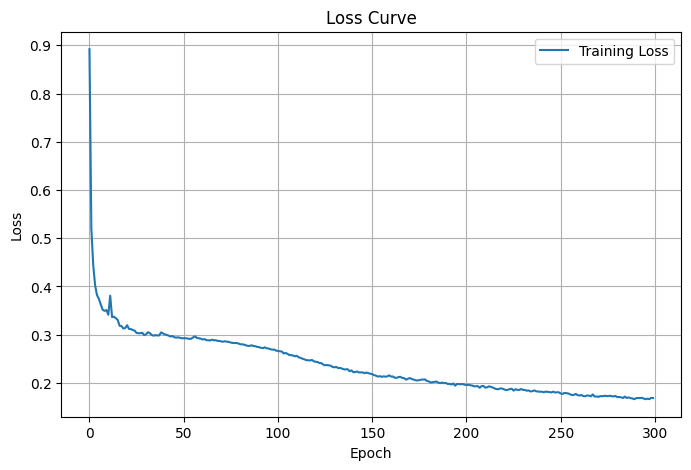

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_dataset = AstroDenoiseDataset(test_noisy, test_clean)

In [ ]:
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import numpy as np

def compute_psnr(pred, target):
    mse = F.mse_loss(pred, target).item()
    if mse == 0:
        return float('inf')
    return 10 * np.log10(1.0 / mse)

def tensor_to_image(t):
    t = t.detach().cpu().numpy().transpose(1, 2, 0)
    t = np.clip(t, 0, 1)
    return t

def visualize_sample_predictions_with_metrics(model, dataset, device, num_samples=3):
    model.eval()
    denorm = T.Compose([
        T.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]),
        T.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
    ])

    with torch.no_grad():
        for i in range(min(num_samples, len(dataset))):
            noisy, clean = dataset[i]
            noisy_input = noisy.unsqueeze(0).to(device)
            pred = model(noisy_input)

            # Denormalize
            noisy_img = denorm(noisy).clamp(0, 1)
            pred_img = denorm(pred.squeeze(0).cpu()).clamp(0, 1)
            clean_img = denorm(clean).clamp(0, 1)

            # Convert to numpy for metrics
            pred_np = tensor_to_image(pred_img)
            clean_np = tensor_to_image(clean_img)

            # Calculate metrics
            psnr_val = compute_psnr(pred_img, clean_img)
            ssim_val = ssim(pred_np, clean_np, channel_axis=-1, data_range=1.0)

            # Display
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            axs[0].imshow(tensor_to_image(noisy_img))
            axs[0].set_title("Noisy Input")
            axs[1].imshow(pred_np)
            axs[1].set_title(f"Prediction\nPSNR: {psnr_val:.2f} dB\nSSIM: {ssim_val:.4f}")
            axs[2].imshow(clean_np)
            axs[2].set_title("Ground Truth")

            for ax in axs:
                ax.axis("off")
            plt.tight_layout()
            plt.show()


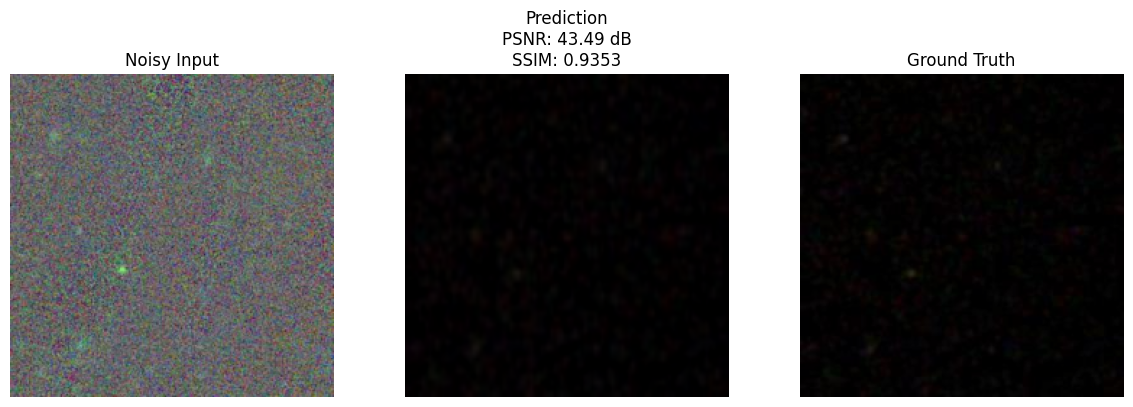

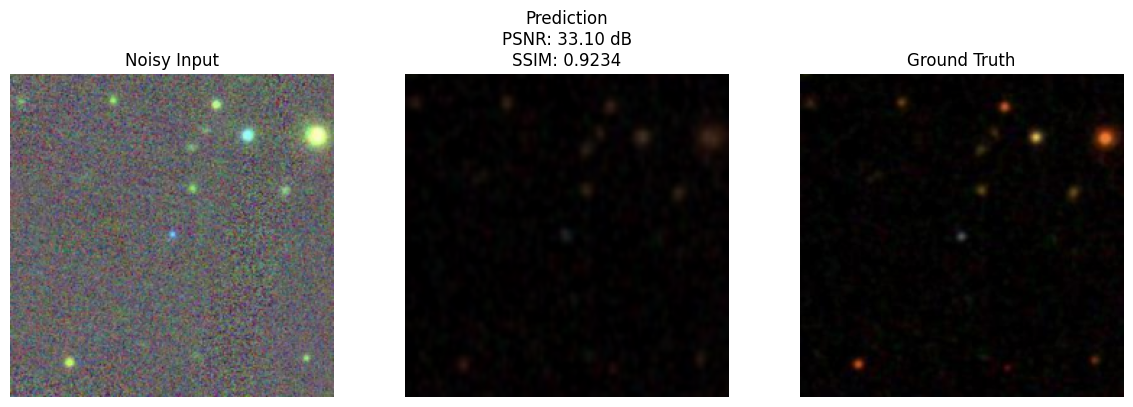

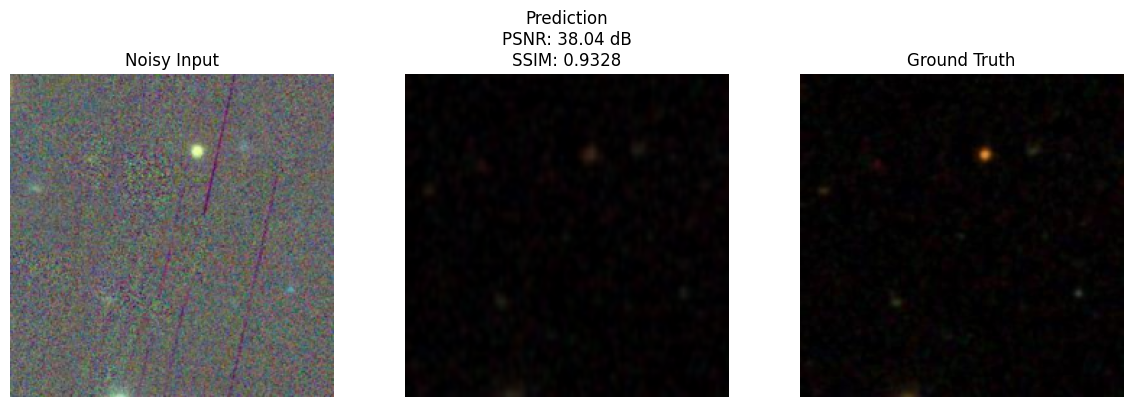

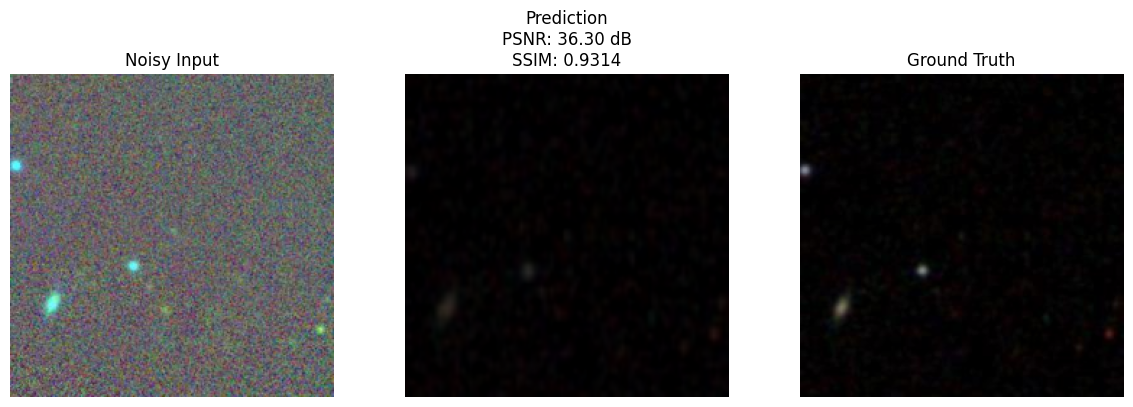

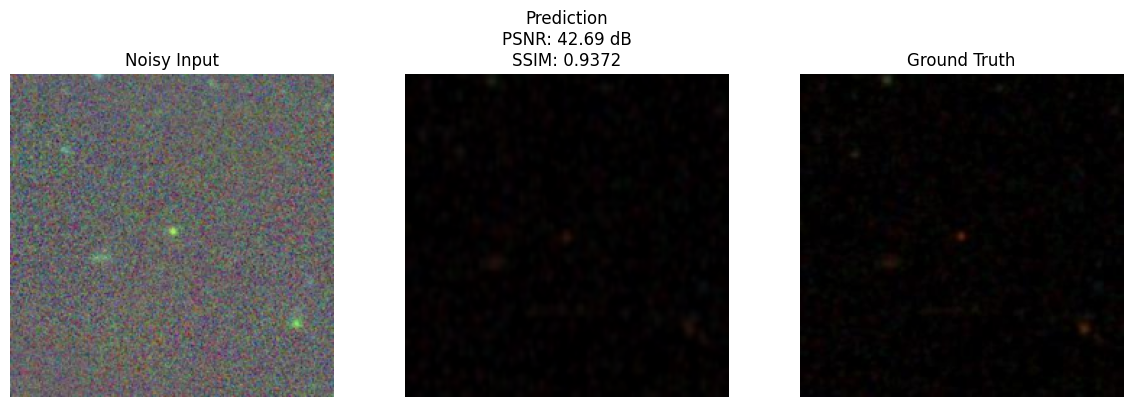

In [ ]:
visualize_sample_predictions_with_metrics(model, train_dataset, device, num_samples=5)

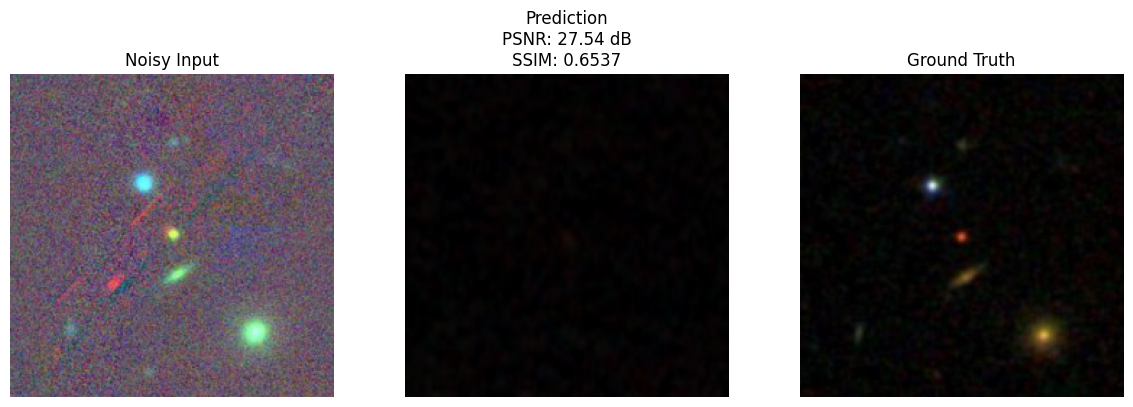

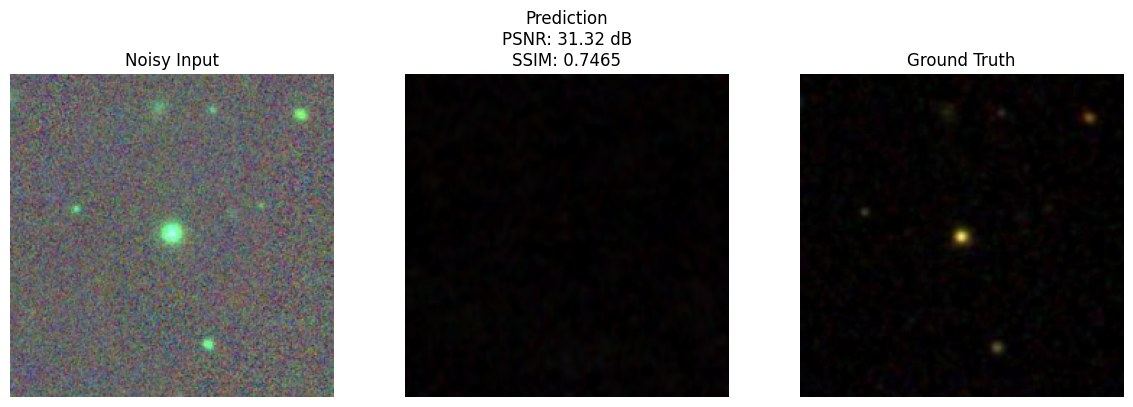

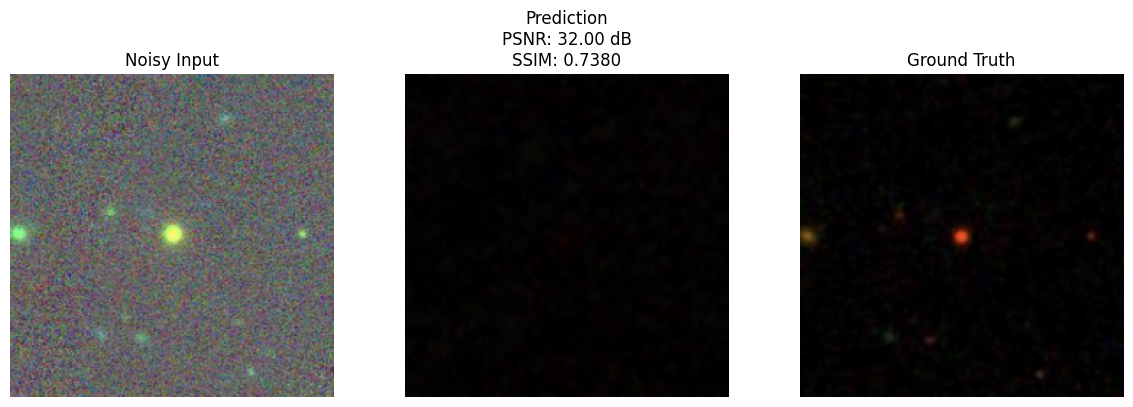

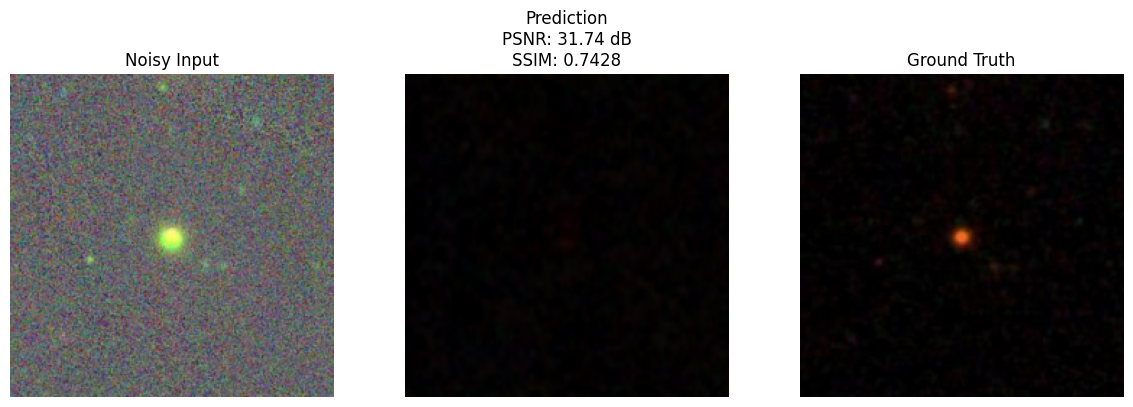

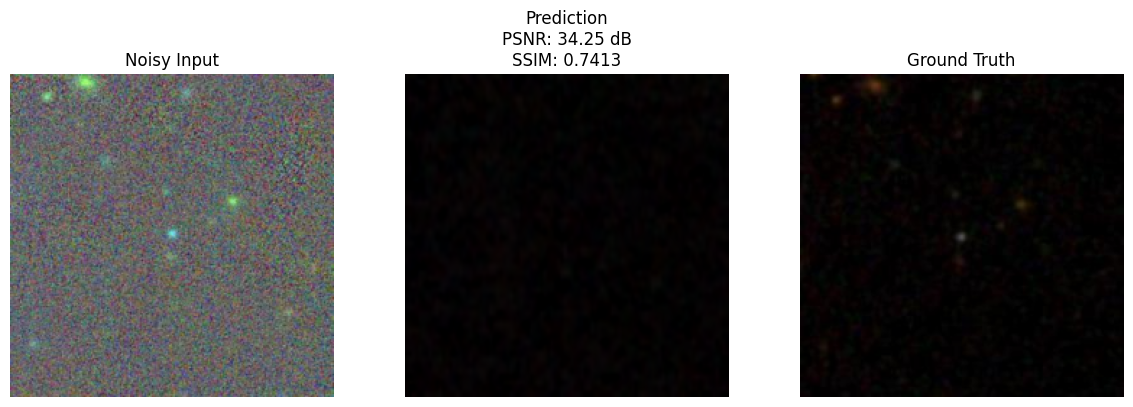

In [ ]:
visualize_sample_predictions_with_metrics(model, test_dataset, device, num_samples=5)

In [ ]:
import torch
import torchvision.transforms as T
from skimage.metrics import structural_similarity as ssim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model_metrics(model, dataset, device):
    model.eval()
    denorm = T.Compose([
        T.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]),
        T.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
    ])

    psnr_list = []
    ssim_list = []

    with torch.no_grad():
        for i in range(len(dataset)):
            noisy, clean = dataset[i]
            noisy_input = noisy.unsqueeze(0).to(device)
            pred = model(noisy_input)

            # Denormalize
            pred_img = denorm(pred.squeeze(0).cpu()).clamp(0, 1)
            clean_img = denorm(clean).clamp(0, 1)

            pred_np = tensor_to_image(pred_img)
            clean_np = tensor_to_image(clean_img)

            psnr_val = compute_psnr(pred_img, clean_img)
            ssim_val = ssim(pred_np, clean_np, channel_axis=-1, data_range=1.0)

            psnr_list.append(psnr_val)
            ssim_list.append(ssim_val)

    return psnr_list, ssim_list


In [ ]:
def plot_metric_histograms(psnr_list, ssim_list):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(psnr_list, bins=20, color='skyblue', edgecolor='black')
    plt.title("PSNR Distribution")
    plt.xlabel("PSNR (dB)")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(ssim_list, bins=20, color='lightgreen', edgecolor='black')
    plt.title("SSIM Distribution")
    plt.xlabel("SSIM")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_boxplots(psnr_list, ssim_list):
    plt.figure(figsize=(8, 4))
    plt.boxplot([psnr_list, ssim_list], labels=['PSNR', 'SSIM'])
    plt.title("Boxplot of PSNR and SSIM")
    plt.grid(True)
    plt.show()


In [ ]:
# Run metrics
train_psnr_list, train_ssim_list = evaluate_model_metrics(model, train_dataset, device)

In [ ]:
# Run metrics
test_psnr_list, test_ssim_list = evaluate_model_metrics(model, test_dataset, device)

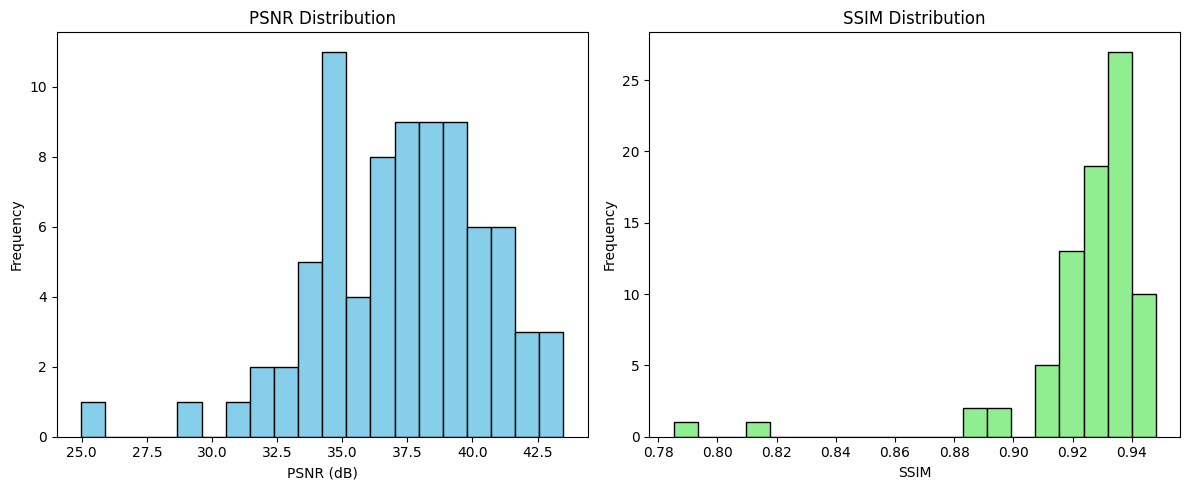

In [ ]:
# Plot distributions
plot_metric_histograms(train_psnr_list, train_ssim_list)

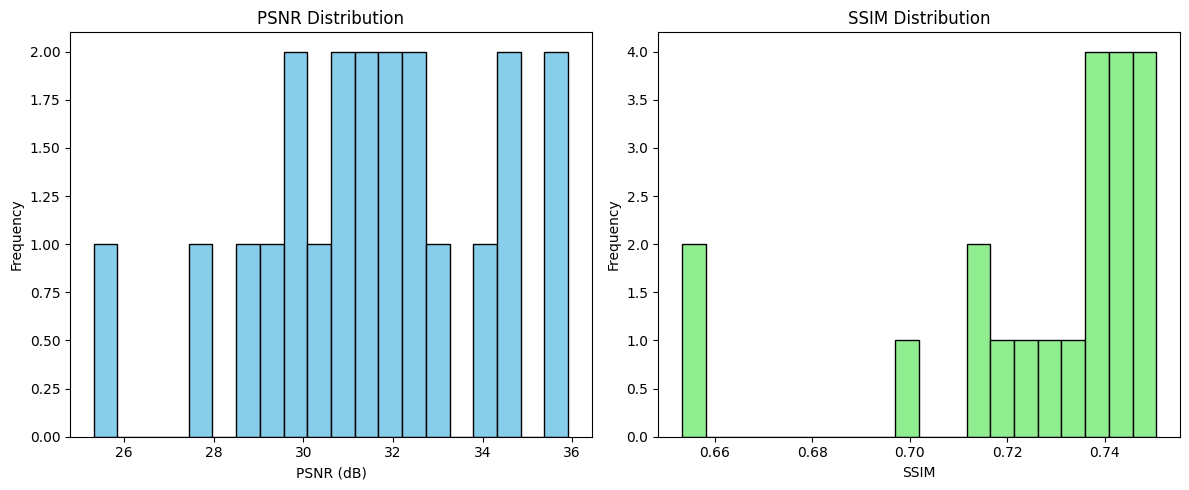

In [ ]:
# Plot distributions
plot_metric_histograms(test_psnr_list, test_ssim_list)

<ipython-input-24-fac308235365>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([psnr_list, ssim_list], labels=['PSNR', 'SSIM'])


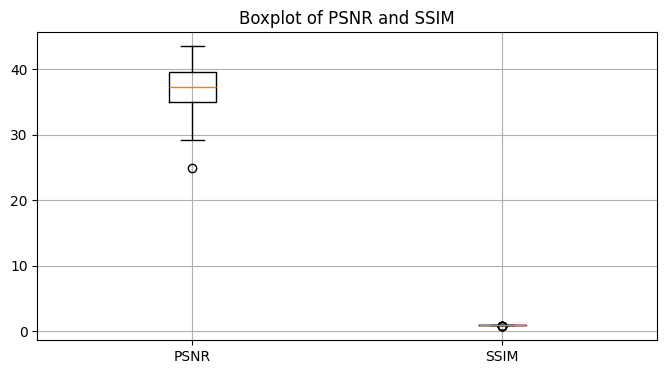

In [ ]:
# (Optional) Boxplot
plot_boxplots(train_psnr_list, train_ssim_list)

<ipython-input-24-fac308235365>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([psnr_list, ssim_list], labels=['PSNR', 'SSIM'])


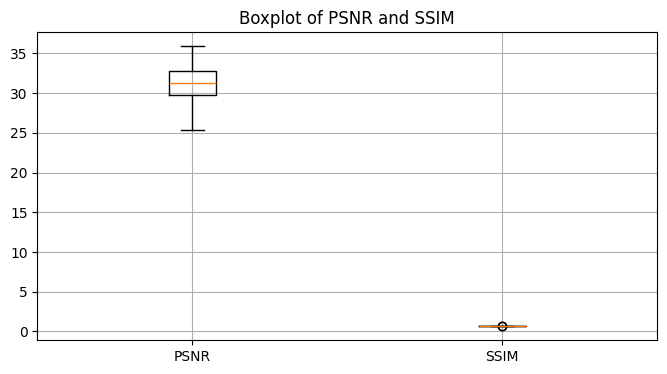

In [ ]:
# (Optional) Boxplot
plot_boxplots(test_psnr_list, test_ssim_list)

In [ ]:
# (Optional) Print Mean and Std
print(f"Average training PSNR: {np.mean(train_psnr_list):.2f} ± {np.std(train_psnr_list):.2f} dB")
print(f"Average training SSIM: {np.mean(train_ssim_list):.4f} ± {np.std(train_ssim_list):.4f}")

Average training PSNR: 37.29 ± 3.27 dB
Average training SSIM: 0.9253 ± 0.0234


In [ ]:
# (Optional) Print Mean and Std
print(f"Average testing PSNR: {np.mean(test_psnr_list):.2f} ± {np.std(test_psnr_list):.2f} dB")
print(f"Average testing SSIM: {np.mean(test_ssim_list):.4f} ± {np.std(test_ssim_list):.4f}")

Average testing PSNR: 31.54 ± 2.66 dB
Average testing SSIM: 0.7262 ± 0.0272
